Как с mmdetection в прошлом проекте не удалось воспользоваться mmsegmentation из-за череды ошибок (но в этот раз хотя бы удалось устанвоить её благодаря хорошей инструкции). Весьма нестабильная система.
Чтобы не терять время, решил идти обходным путём.

#### Этап 1: EDA

--- TRAIN ---
Изображений: 191
Масок: 191
Соответствие имен: True

--- VAL ---
Изображений: 120
Масок: 120
Соответствие имен: True

--- TEST ---
Изображений: 120
Масок: 120
Соответствие имен: True

В результате наложения масок с подобранной прозрачночтью 0.6 были выявлены несодержательные маски, подлежащие удалению вместе с базовым изображением

Пример корректной маски:<br/>
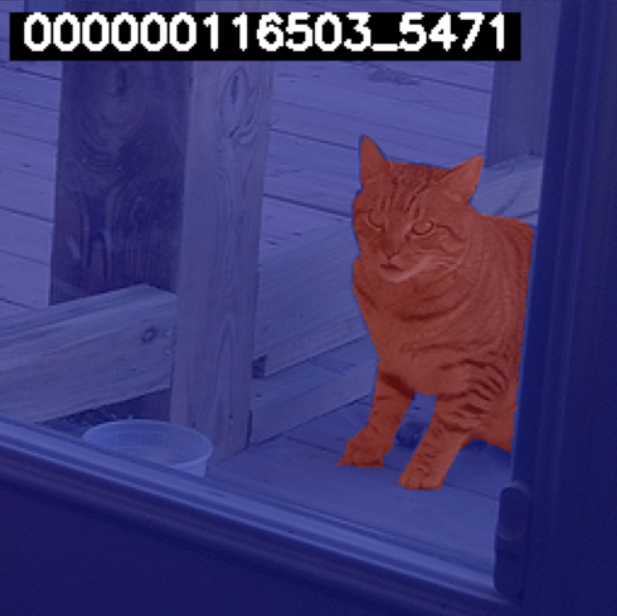

Пример некорректной маски:<br/>
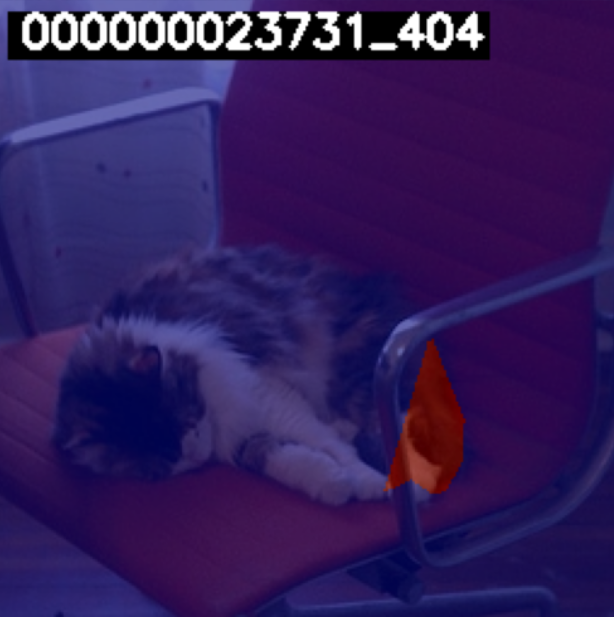


#### Этап 2. Формирование первичных гипотез

##### Гипотеза 1: UNet с BCE Loss
Логика выбора:
- Модель: UNet - классическая архитектура для семантической сегментации
- Loss: Binary Cross Entropy - стандартный выбор для бинарной сегментации
- Оптимизатор: Adam с learning rate 1e-4
- Аугментации: базовые (flip, rotate, brightness/contrast)

##### Гипотеза 2: UNet с Dice Loss
Логика выбора:
- Loss: Dice Loss - напрямую оптимизирует целевую метрику
- Остальные параметры аналогичны гипотезе 1

#### Этап 3. Эксперименты по улучшению качества

In [1]:
import torch
from src.config import ExperimentConfig
from src.dataset import PetSegmentationDataset, get_augmentations
from src.model import create_model
from src.trainer import SegmentationTrainer
from src.utils import visualize_predictions, plot_training_history
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

d:\ML\Yandex\Projects\segmentation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


=== Гипотеза 1: UNet с BCE Loss ===
Train samples: 191
Val samples: 120
Test samples: 120
Model: unet with resnet101 encoder
Trainable parameters: 51,513,233
ClearML Task: created new task id=a543547c70cb40beaa9738f6a0b889d7
2025-11-15 23:39:48,836 - clearml.Task - INFO - No repository found, storing script code instead
ClearML results page: https://app.clear.ml/projects/ff2423fcc9e04f8daff4339e391bab95/experiments/a543547c70cb40beaa9738f6a0b889d7/output/log
2025-11-15 23:39:50,423 - clearml.Task - WARNING - Parameters must be of builtin type (General/data[DataConfig], General/model[ModelConfig], General/training[TrainingConfig], General/augmentation[AugmentationConfig])
ClearML initialized: unet_bce_baseline

Epoch 1/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.4696, Dice: 0.2189
Val Loss: 0.4530, Dice: 0.2906, IoU: 0.4271
New best model saved with Dice: 0.2906

Epoch 2/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.3559, Dice: 0.3091
Val Loss: 0.3348, Dice: 0.3825, IoU: 0.5528
New best model saved with Dice: 0.3825

Epoch 3/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


Train Loss: 0.2838, Dice: 0.3669
Val Loss: 0.2523, Dice: 0.4179, IoU: 0.6547
New best model saved with Dice: 0.4179

Epoch 4/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


Train Loss: 0.2359, Dice: 0.4168
Val Loss: 0.2251, Dice: 0.4803, IoU: 0.6717
New best model saved with Dice: 0.4803

Epoch 5/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


Train Loss: 0.1982, Dice: 0.4635
Val Loss: 0.1865, Dice: 0.4984, IoU: 0.7304
New best model saved with Dice: 0.4984

Epoch 6/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]


Train Loss: 0.1764, Dice: 0.4917
Val Loss: 0.1752, Dice: 0.5164, IoU: 0.7380
New best model saved with Dice: 0.5164

Epoch 7/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s]


Train Loss: 0.1579, Dice: 0.5218
Val Loss: 0.1579, Dice: 0.5482, IoU: 0.7598
New best model saved with Dice: 0.5482

Epoch 8/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]


Train Loss: 0.1465, Dice: 0.5456
Val Loss: 0.1542, Dice: 0.5619, IoU: 0.7451
New best model saved with Dice: 0.5619

Epoch 9/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.71it/s]


Train Loss: 0.1338, Dice: 0.5713
Val Loss: 0.1427, Dice: 0.5714, IoU: 0.7645
New best model saved with Dice: 0.5714

Epoch 10/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


Train Loss: 0.1237, Dice: 0.5911
Val Loss: 0.1427, Dice: 0.5932, IoU: 0.7529
New best model saved with Dice: 0.5932

Epoch 11/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]


Train Loss: 0.1155, Dice: 0.6084
Val Loss: 0.1266, Dice: 0.6089, IoU: 0.7739
New best model saved with Dice: 0.6089

Epoch 12/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]


Train Loss: 0.1141, Dice: 0.6168
Val Loss: 0.1197, Dice: 0.6322, IoU: 0.7829
New best model saved with Dice: 0.6322

Epoch 13/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.89it/s]


Train Loss: 0.1053, Dice: 0.6349
Val Loss: 0.1221, Dice: 0.6406, IoU: 0.7663
New best model saved with Dice: 0.6406

Epoch 14/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.0995, Dice: 0.6515
Val Loss: 0.1106, Dice: 0.6586, IoU: 0.7936
New best model saved with Dice: 0.6586

Epoch 15/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s]


Train Loss: 0.0922, Dice: 0.6716
Val Loss: 0.1122, Dice: 0.6460, IoU: 0.7749

Epoch 16/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


Train Loss: 0.0905, Dice: 0.6710
Val Loss: 0.1116, Dice: 0.6886, IoU: 0.7766
New best model saved with Dice: 0.6886

Epoch 17/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


Train Loss: 0.0843, Dice: 0.6917
Val Loss: 0.1052, Dice: 0.6739, IoU: 0.7814

Epoch 18/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Train Loss: 0.0804, Dice: 0.7035
Val Loss: 0.0982, Dice: 0.6908, IoU: 0.8002
New best model saved with Dice: 0.6908

Epoch 19/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]


Train Loss: 0.0755, Dice: 0.7173
Val Loss: 0.0980, Dice: 0.6994, IoU: 0.7991
New best model saved with Dice: 0.6994

Epoch 20/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]


Train Loss: 0.0724, Dice: 0.7283
Val Loss: 0.0928, Dice: 0.7093, IoU: 0.8081
New best model saved with Dice: 0.7093

Epoch 21/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s]


Train Loss: 0.0696, Dice: 0.7360
Val Loss: 0.0913, Dice: 0.7167, IoU: 0.8042
New best model saved with Dice: 0.7167

Epoch 22/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s]


Train Loss: 0.0666, Dice: 0.7467
Val Loss: 0.0890, Dice: 0.7235, IoU: 0.8070
New best model saved with Dice: 0.7235

Epoch 23/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.0654, Dice: 0.7478
Val Loss: 0.0890, Dice: 0.7313, IoU: 0.8055
New best model saved with Dice: 0.7313

Epoch 24/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.64it/s]


Train Loss: 0.0620, Dice: 0.7616
Val Loss: 0.0881, Dice: 0.7350, IoU: 0.8051
New best model saved with Dice: 0.7350

Epoch 25/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Train Loss: 0.0607, Dice: 0.7628
Val Loss: 0.0853, Dice: 0.7449, IoU: 0.8130
New best model saved with Dice: 0.7449

Epoch 26/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


Train Loss: 0.0585, Dice: 0.7726
Val Loss: 0.0857, Dice: 0.7504, IoU: 0.8078
New best model saved with Dice: 0.7504

Epoch 27/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]


Train Loss: 0.0566, Dice: 0.7755
Val Loss: 0.0830, Dice: 0.7495, IoU: 0.8109

Epoch 28/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.0555, Dice: 0.7847
Val Loss: 0.0834, Dice: 0.7513, IoU: 0.8085
New best model saved with Dice: 0.7513

Epoch 29/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


Train Loss: 0.0541, Dice: 0.7889
Val Loss: 0.0822, Dice: 0.7552, IoU: 0.8102
New best model saved with Dice: 0.7552

Epoch 30/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]


Train Loss: 0.0530, Dice: 0.7912
Val Loss: 0.0817, Dice: 0.7661, IoU: 0.8132
New best model saved with Dice: 0.7661

Epoch 31/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.0521, Dice: 0.7898
Val Loss: 0.0803, Dice: 0.7691, IoU: 0.8139
New best model saved with Dice: 0.7691

Epoch 32/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.66it/s]


Train Loss: 0.0508, Dice: 0.8002
Val Loss: 0.0801, Dice: 0.7674, IoU: 0.8137

Epoch 33/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s]


Train Loss: 0.0504, Dice: 0.8009
Val Loss: 0.0789, Dice: 0.7703, IoU: 0.8154
New best model saved with Dice: 0.7703

Epoch 34/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


Train Loss: 0.0492, Dice: 0.8036
Val Loss: 0.0792, Dice: 0.7677, IoU: 0.8139

Epoch 35/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Train Loss: 0.0487, Dice: 0.8040
Val Loss: 0.0787, Dice: 0.7730, IoU: 0.8154
New best model saved with Dice: 0.7730

Epoch 36/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.71it/s]


Train Loss: 0.0482, Dice: 0.8033
Val Loss: 0.0790, Dice: 0.7719, IoU: 0.8128

Epoch 37/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]


Train Loss: 0.0467, Dice: 0.8134
Val Loss: 0.0786, Dice: 0.7717, IoU: 0.8118

Epoch 38/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Train Loss: 0.0470, Dice: 0.8069
Val Loss: 0.0771, Dice: 0.7768, IoU: 0.8166
New best model saved with Dice: 0.7768

Epoch 39/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s]


Train Loss: 0.0460, Dice: 0.8139
Val Loss: 0.0767, Dice: 0.7789, IoU: 0.8179
New best model saved with Dice: 0.7789

Epoch 40/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]


Train Loss: 0.0462, Dice: 0.8143
Val Loss: 0.0769, Dice: 0.7828, IoU: 0.8174
New best model saved with Dice: 0.7828

Epoch 41/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.0453, Dice: 0.8175
Val Loss: 0.0761, Dice: 0.7824, IoU: 0.8190

Epoch 42/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]


Train Loss: 0.0450, Dice: 0.8157
Val Loss: 0.0761, Dice: 0.7814, IoU: 0.8191

Epoch 43/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]


Train Loss: 0.0447, Dice: 0.8198
Val Loss: 0.0764, Dice: 0.7832, IoU: 0.8197
New best model saved with Dice: 0.7832

Epoch 44/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.90it/s]


Train Loss: 0.0450, Dice: 0.8141
Val Loss: 0.0761, Dice: 0.7826, IoU: 0.8185

Epoch 45/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.10it/s]


Train Loss: 0.0444, Dice: 0.8197
Val Loss: 0.0760, Dice: 0.7843, IoU: 0.8186
New best model saved with Dice: 0.7843

Epoch 46/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s]


Train Loss: 0.0446, Dice: 0.8187
Val Loss: 0.0759, Dice: 0.7845, IoU: 0.8196
New best model saved with Dice: 0.7845

Epoch 47/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.76it/s]


Train Loss: 0.0444, Dice: 0.8211
Val Loss: 0.0759, Dice: 0.7838, IoU: 0.8181

Epoch 48/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.00it/s]


Train Loss: 0.0447, Dice: 0.8150
Val Loss: 0.0762, Dice: 0.7843, IoU: 0.8189

Epoch 49/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s]


Train Loss: 0.0443, Dice: 0.8221
Val Loss: 0.0760, Dice: 0.7839, IoU: 0.8188

Epoch 50/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.0441, Dice: 0.8180
Val Loss: 0.0761, Dice: 0.7833, IoU: 0.8183

Evaluating on test set...


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s]


Final Test - Loss: 0.0670, Dice: 0.7949, IoU: 0.8440
Гипотеза 1 - Final Test Dice: 0.7949, IoU: 0.8440


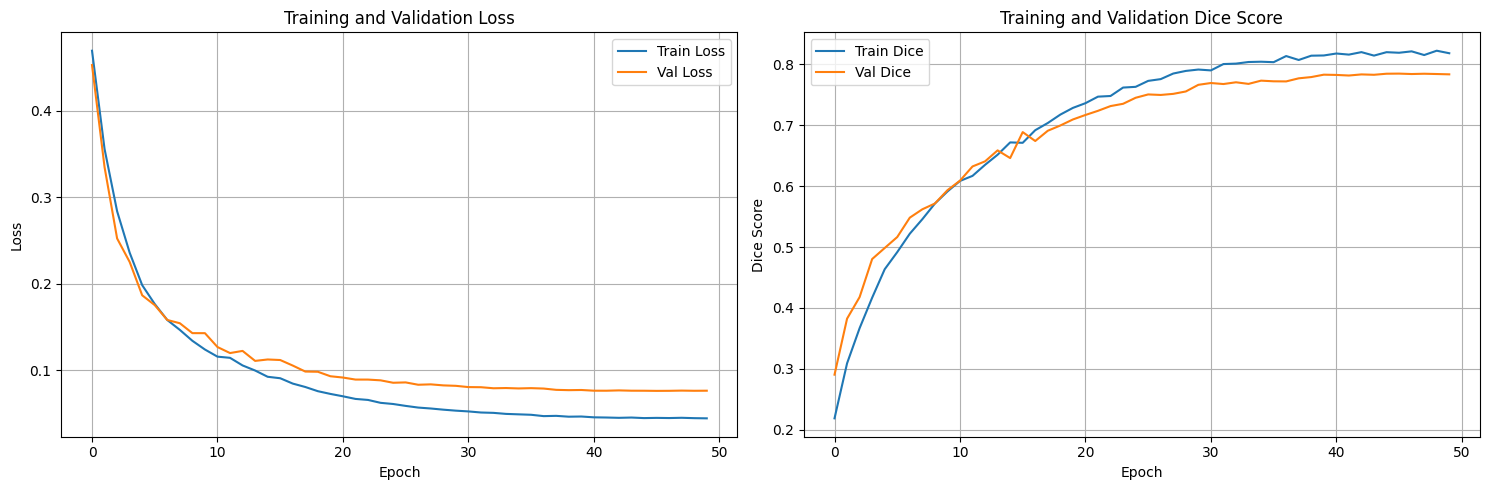


Визуализация предсказаний на валидационном наборе:


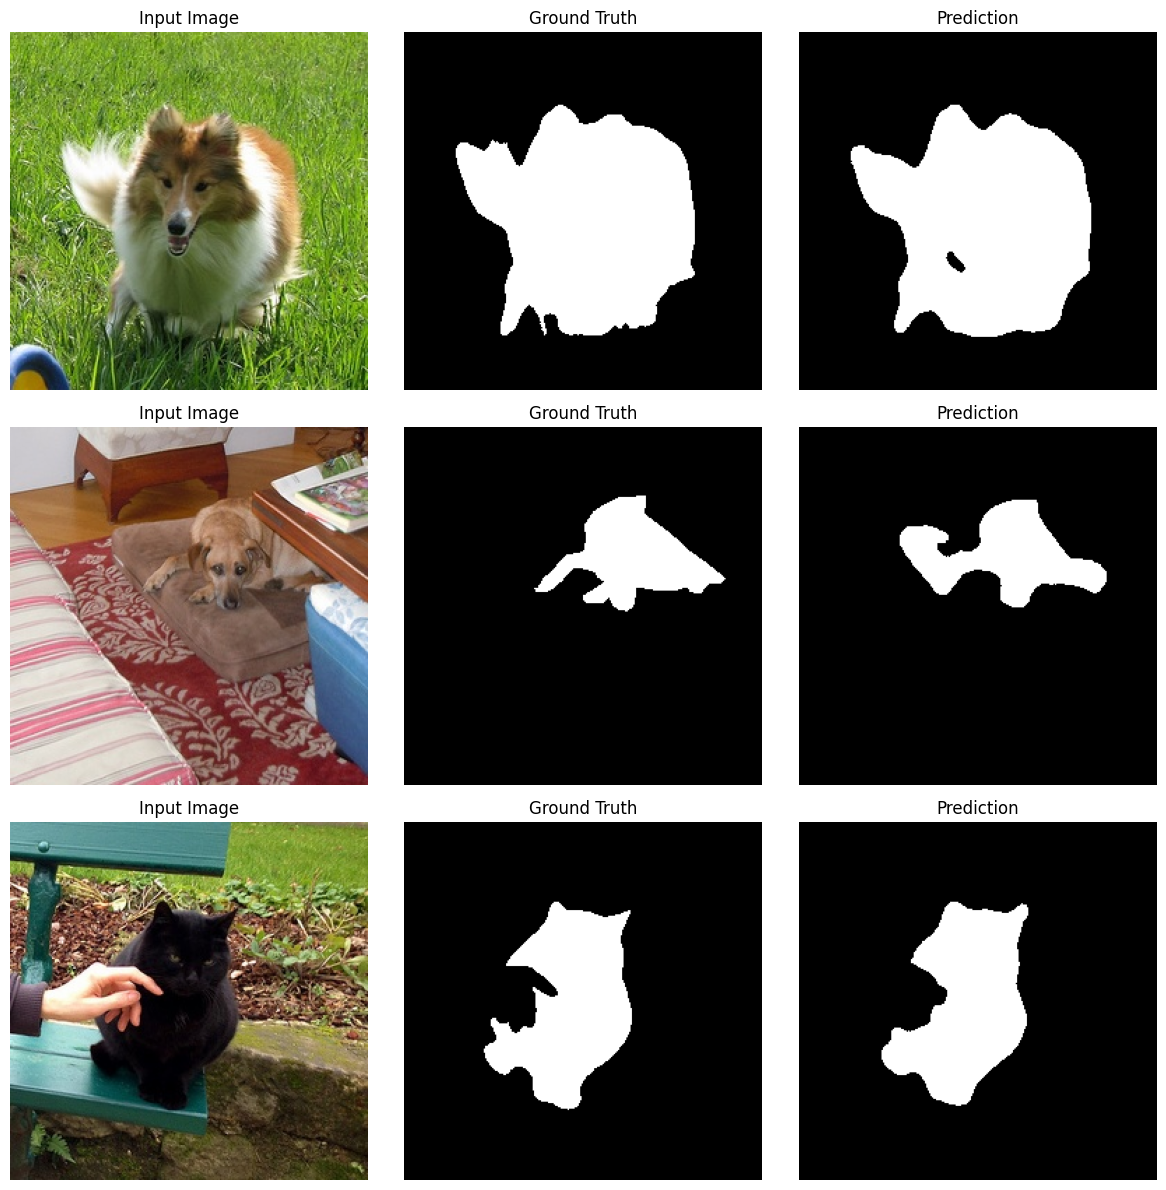

Closed ClearML task: unet_bce_baseline


In [3]:
print("=== Гипотеза 1: UNet с BCE Loss ===")
config_bce = ExperimentConfig.from_yaml('configs/baseline.yaml')

train_augmentations = get_augmentations(config_bce, is_training=True)
val_augmentations = get_augmentations(config_bce, is_training=False)

train_dataset = PetSegmentationDataset(
    config_bce.data.data_dir, 'train', 
    config_bce.data.img_size, train_augmentations
)
val_dataset = PetSegmentationDataset(
    config_bce.data.data_dir, 'val',
    config_bce.data.img_size, val_augmentations
)
test_dataset = PetSegmentationDataset(
    config_bce.data.data_dir, 'test',
    config_bce.data.img_size, val_augmentations
)

print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

train_loader = DataLoader(
    train_dataset, batch_size=config_bce.data.batch_size, 
    shuffle=True, num_workers=config_bce.data.num_workers
)
val_loader = DataLoader(
    val_dataset, batch_size=config_bce.data.batch_size, 
    shuffle=False, num_workers=config_bce.data.num_workers
)
test_loader = DataLoader(
    test_dataset, batch_size=config_bce.data.batch_size, 
    shuffle=False, num_workers=config_bce.data.num_workers
)

# Создание и обучение модели
model_bce = create_model(config_bce)
print(f"Model: {config_bce.model.name} with {config_bce.model.encoder} encoder")
print(f"Trainable parameters: {sum(p.numel() for p in model_bce.parameters() if p.requires_grad):,}")

trainer_bce = SegmentationTrainer(model_bce, config_bce, device)

# Обучение
history_bce, test_dice_bce, test_iou_bce = trainer_bce.train(
    train_loader, val_loader, test_loader
)

print(f"Гипотеза 1 - Final Test Dice: {test_dice_bce:.4f}, IoU: {test_iou_bce:.4f}")

# Визуализация результатов
fig = plot_training_history(history_bce)
plt.show()

# Визуализация предсказаний
print("\nВизуализация предсказаний на валидационном наборе:")
fig = visualize_predictions(model_bce, val_loader, device, num_examples=3)
plt.show()

# Явно закрываем задачу ClearML перед следующей гипотезой
trainer_bce.close()

Train samples: 191
Val samples: 120
Test samples: 120
Model: unet with resnet101 encoder
Trainable parameters: 51,513,233
ClearML Task: created new task id=b17f5349e738452a979ecdc2b5176b97
ClearML results page: https://app.clear.ml/projects/ff2423fcc9e04f8daff4339e391bab95/experiments/b17f5349e738452a979ecdc2b5176b97/output/log


Parameters must be of builtin type (General/data[DataConfig], General/model[ModelConfig], General/training[TrainingConfig], General/augmentation[AugmentationConfig])


ClearML initialized: unet_dice_experiment

Epoch 1/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


Train Loss: 0.7719, Dice: 0.2281
Val Loss: 0.7023, Dice: 0.2977, IoU: 0.1997
New best model saved with Dice: 0.2977

Epoch 2/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.7010, Dice: 0.2990
Val Loss: 0.6554, Dice: 0.3446, IoU: 0.3579
New best model saved with Dice: 0.3446

Epoch 3/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.06it/s]


Train Loss: 0.6661, Dice: 0.3339
Val Loss: 0.6247, Dice: 0.3753, IoU: 0.5001
New best model saved with Dice: 0.3753

Epoch 4/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.6403, Dice: 0.3597
Val Loss: 0.6013, Dice: 0.3987, IoU: 0.4970
New best model saved with Dice: 0.3987

Epoch 5/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.18it/s]


Train Loss: 0.6099, Dice: 0.3901
Val Loss: 0.5731, Dice: 0.4269, IoU: 0.5840
New best model saved with Dice: 0.4269

Epoch 6/50


Validation: 100%|██████████| 15/15 [00:04<00:00,  3.17it/s]


Train Loss: 0.5854, Dice: 0.4146
Val Loss: 0.5467, Dice: 0.4533, IoU: 0.6321
New best model saved with Dice: 0.4533

Epoch 7/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.5539, Dice: 0.4461
Val Loss: 0.5237, Dice: 0.4763, IoU: 0.6820
New best model saved with Dice: 0.4763

Epoch 8/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.5280, Dice: 0.4720
Val Loss: 0.5065, Dice: 0.4935, IoU: 0.6297
New best model saved with Dice: 0.4935

Epoch 9/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


Train Loss: 0.4990, Dice: 0.5010
Val Loss: 0.4783, Dice: 0.5217, IoU: 0.7226
New best model saved with Dice: 0.5217

Epoch 10/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s]


Train Loss: 0.4799, Dice: 0.5201
Val Loss: 0.4602, Dice: 0.5398, IoU: 0.6316
New best model saved with Dice: 0.5398

Epoch 11/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s]


Train Loss: 0.4516, Dice: 0.5484
Val Loss: 0.4227, Dice: 0.5773, IoU: 0.7334
New best model saved with Dice: 0.5773

Epoch 12/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.60it/s]


Train Loss: 0.4276, Dice: 0.5724
Val Loss: 0.4052, Dice: 0.5948, IoU: 0.7161
New best model saved with Dice: 0.5948

Epoch 13/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]


Train Loss: 0.3998, Dice: 0.6002
Val Loss: 0.3936, Dice: 0.6064, IoU: 0.7184
New best model saved with Dice: 0.6064

Epoch 14/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


Train Loss: 0.3801, Dice: 0.6199
Val Loss: 0.3964, Dice: 0.6036, IoU: 0.6905

Epoch 15/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


Train Loss: 0.3547, Dice: 0.6453
Val Loss: 0.3571, Dice: 0.6429, IoU: 0.7334
New best model saved with Dice: 0.6429

Epoch 16/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s]


Train Loss: 0.3475, Dice: 0.6525
Val Loss: 0.3424, Dice: 0.6576, IoU: 0.7075
New best model saved with Dice: 0.6576

Epoch 17/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]


Train Loss: 0.3217, Dice: 0.6783
Val Loss: 0.3274, Dice: 0.6726, IoU: 0.7218
New best model saved with Dice: 0.6726

Epoch 18/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.3051, Dice: 0.6949
Val Loss: 0.3057, Dice: 0.6943, IoU: 0.7408
New best model saved with Dice: 0.6943

Epoch 19/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]


Train Loss: 0.2884, Dice: 0.7116
Val Loss: 0.2912, Dice: 0.7088, IoU: 0.7705
New best model saved with Dice: 0.7088

Epoch 20/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.09it/s]


Train Loss: 0.2678, Dice: 0.7322
Val Loss: 0.2789, Dice: 0.7211, IoU: 0.7648
New best model saved with Dice: 0.7211

Epoch 21/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.2586, Dice: 0.7414
Val Loss: 0.2607, Dice: 0.7393, IoU: 0.7951
New best model saved with Dice: 0.7393

Epoch 22/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.2453, Dice: 0.7547
Val Loss: 0.2629, Dice: 0.7371, IoU: 0.7618

Epoch 23/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s]


Train Loss: 0.2424, Dice: 0.7576
Val Loss: 0.2598, Dice: 0.7402, IoU: 0.7638
New best model saved with Dice: 0.7402

Epoch 24/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


Train Loss: 0.2293, Dice: 0.7707
Val Loss: 0.2773, Dice: 0.7227, IoU: 0.7287

Epoch 25/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


Train Loss: 0.2288, Dice: 0.7712
Val Loss: 0.2589, Dice: 0.7411, IoU: 0.7411
New best model saved with Dice: 0.7411

Epoch 26/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.2114, Dice: 0.7886
Val Loss: 0.2686, Dice: 0.7314, IoU: 0.7197

Epoch 27/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s]


Train Loss: 0.2097, Dice: 0.7903
Val Loss: 0.2478, Dice: 0.7522, IoU: 0.7456
New best model saved with Dice: 0.7522

Epoch 28/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


Train Loss: 0.1984, Dice: 0.8016
Val Loss: 0.2405, Dice: 0.7595, IoU: 0.7536
New best model saved with Dice: 0.7595

Epoch 29/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.69it/s]


Train Loss: 0.1883, Dice: 0.8117
Val Loss: 0.2340, Dice: 0.7660, IoU: 0.7622
New best model saved with Dice: 0.7660

Epoch 30/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


Train Loss: 0.1847, Dice: 0.8153
Val Loss: 0.2290, Dice: 0.7710, IoU: 0.7657
New best model saved with Dice: 0.7710

Epoch 31/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.1843, Dice: 0.8157
Val Loss: 0.2237, Dice: 0.7763, IoU: 0.7648
New best model saved with Dice: 0.7763

Epoch 32/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


Train Loss: 0.1730, Dice: 0.8270
Val Loss: 0.2133, Dice: 0.7867, IoU: 0.7786
New best model saved with Dice: 0.7867

Epoch 33/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Train Loss: 0.1711, Dice: 0.8289
Val Loss: 0.2083, Dice: 0.7917, IoU: 0.7836
New best model saved with Dice: 0.7917

Epoch 34/50


Validation: 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Train Loss: 0.1686, Dice: 0.8314
Val Loss: 0.2090, Dice: 0.7910, IoU: 0.7799

Epoch 35/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]


Train Loss: 0.1667, Dice: 0.8333
Val Loss: 0.1980, Dice: 0.8020, IoU: 0.7970
New best model saved with Dice: 0.8020

Epoch 36/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.71it/s]


Train Loss: 0.1682, Dice: 0.8318
Val Loss: 0.1989, Dice: 0.8011, IoU: 0.7926

Epoch 37/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.85it/s]


Train Loss: 0.1562, Dice: 0.8438
Val Loss: 0.2025, Dice: 0.7975, IoU: 0.7816

Epoch 38/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.1641, Dice: 0.8359
Val Loss: 0.2016, Dice: 0.7984, IoU: 0.7806

Epoch 39/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]


Train Loss: 0.1556, Dice: 0.8444
Val Loss: 0.2042, Dice: 0.7958, IoU: 0.7749

Epoch 40/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.50it/s]


Train Loss: 0.1537, Dice: 0.8463
Val Loss: 0.2044, Dice: 0.7956, IoU: 0.7735

Epoch 41/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]


Train Loss: 0.1512, Dice: 0.8488
Val Loss: 0.2039, Dice: 0.7961, IoU: 0.7738

Epoch 42/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.1537, Dice: 0.8463
Val Loss: 0.2004, Dice: 0.7996, IoU: 0.7792

Epoch 43/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


Train Loss: 0.1495, Dice: 0.8505
Val Loss: 0.2013, Dice: 0.7987, IoU: 0.7805

Epoch 44/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]


Train Loss: 0.1539, Dice: 0.8461
Val Loss: 0.1993, Dice: 0.8007, IoU: 0.7799

Epoch 45/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]


Train Loss: 0.1502, Dice: 0.8498
Val Loss: 0.1993, Dice: 0.8007, IoU: 0.7791

Epoch 46/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.79it/s]


Train Loss: 0.1499, Dice: 0.8501
Val Loss: 0.1979, Dice: 0.8021, IoU: 0.7829
New best model saved with Dice: 0.8021

Epoch 47/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.67it/s]


Train Loss: 0.1466, Dice: 0.8534
Val Loss: 0.1985, Dice: 0.8015, IoU: 0.7787

Epoch 48/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.81it/s]


Train Loss: 0.1520, Dice: 0.8480
Val Loss: 0.1979, Dice: 0.8021, IoU: 0.7826
New best model saved with Dice: 0.8021

Epoch 49/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]


Train Loss: 0.1453, Dice: 0.8547
Val Loss: 0.1995, Dice: 0.8005, IoU: 0.7793

Epoch 50/50


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Train Loss: 0.1500, Dice: 0.8500
Val Loss: 0.1972, Dice: 0.8028, IoU: 0.7823
New best model saved with Dice: 0.8028

Evaluating on test set...


Validation: 100%|██████████| 15/15 [00:02<00:00,  5.59it/s]


Final Test - Loss: 0.1686, Dice: 0.8314, IoU: 0.8369
Гипотеза 2 - Final Test Dice: 0.8314, IoU: 0.8369


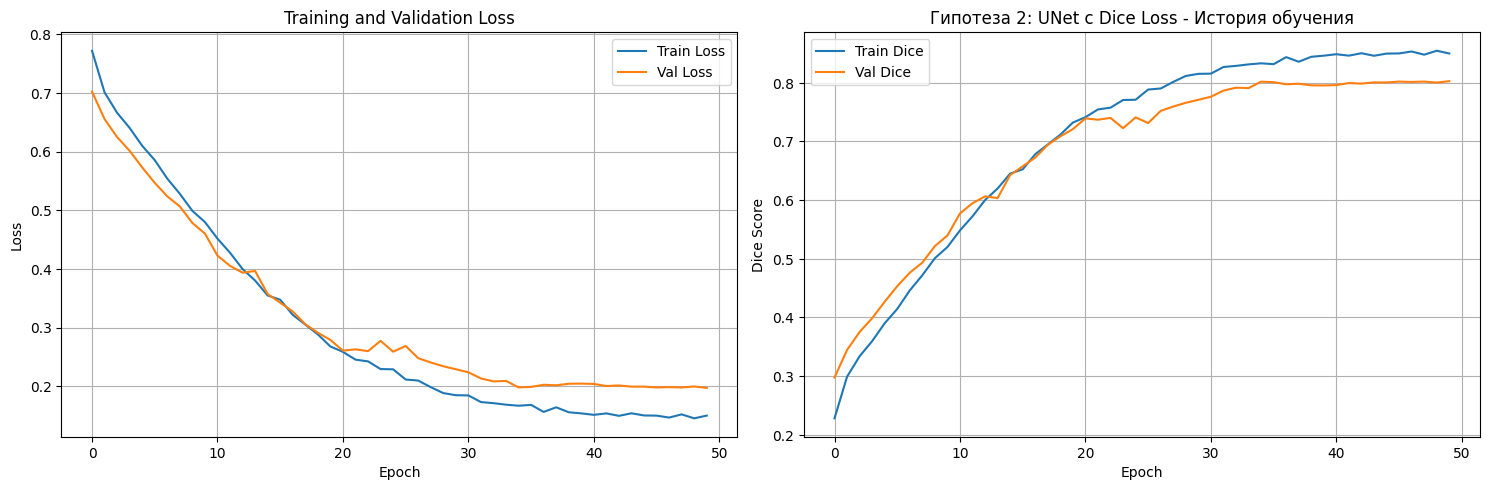


Визуализация предсказаний второй гипотезы на валидационном наборе:


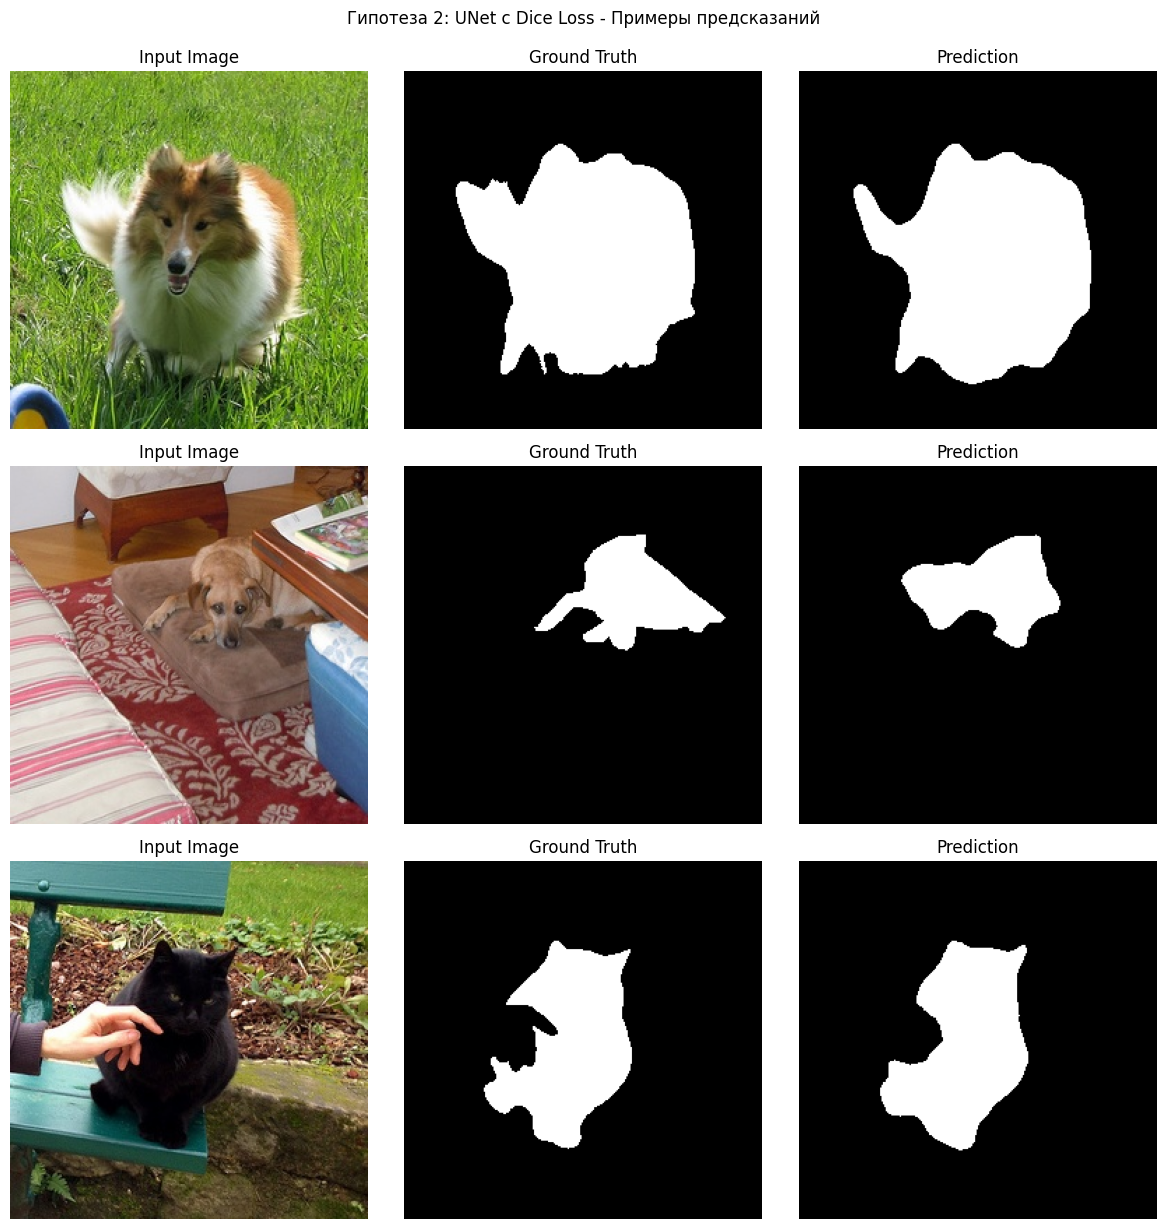

Closed ClearML task: unet_dice_experiment


In [4]:
# Гипотеза 2: UNet с Dice Loss

config_dice = ExperimentConfig.from_yaml('configs/dice_loss.yaml')

# Создание датасетов и даталоадеров для второй гипотезы
train_augmentations_dice = get_augmentations(config_dice, is_training=True)
val_augmentations_dice = get_augmentations(config_dice, is_training=False)

train_dataset_dice = PetSegmentationDataset(
    config_dice.data.data_dir, 'train', 
    config_dice.data.img_size, train_augmentations_dice
)
val_dataset_dice = PetSegmentationDataset(
    config_dice.data.data_dir, 'val',
    config_dice.data.img_size, val_augmentations_dice
)
test_dataset_dice = PetSegmentationDataset(
    config_dice.data.data_dir, 'test',
    config_dice.data.img_size, val_augmentations_dice
)

print(f"Train samples: {len(train_dataset_dice)}")
print(f"Val samples: {len(val_dataset_dice)}")
print(f"Test samples: {len(test_dataset_dice)}")

train_loader_dice = DataLoader(
    train_dataset_dice, batch_size=config_dice.data.batch_size, 
    shuffle=True, num_workers=config_dice.data.num_workers
)
val_loader_dice = DataLoader(
    val_dataset_dice, batch_size=config_dice.data.batch_size, 
    shuffle=False, num_workers=config_dice.data.num_workers
)
test_loader_dice = DataLoader(
    test_dataset_dice, batch_size=config_dice.data.batch_size, 
    shuffle=False, num_workers=config_dice.data.num_workers
)

# Создание и обучение модели для второй гипотезы
model_dice = create_model(config_dice)
print(f"Model: {config_dice.model.name} with {config_dice.model.encoder} encoder")
print(f"Trainable parameters: {sum(p.numel() for p in model_dice.parameters() if p.requires_grad):,}")

trainer_dice = SegmentationTrainer(model_dice, config_dice, device)

# Обучение второй гипотезы
history_dice, test_dice_dice, test_iou_dice = trainer_dice.train(
    train_loader_dice, val_loader_dice, test_loader_dice
)

print(f"Гипотеза 2 - Final Test Dice: {test_dice_dice:.4f}, IoU: {test_iou_dice:.4f}")

# Визуализация результатов второй гипотезы
fig = plot_training_history(history_dice)
plt.title("Гипотеза 2: UNet с Dice Loss - История обучения")
plt.show()

# Визуализация предсказаний для второй гипотезы
print("\nВизуализация предсказаний второй гипотезы на валидационном наборе:")
fig = visualize_predictions(model_dice, val_loader_dice, device, num_examples=3)
plt.suptitle("Гипотеза 2: UNet с Dice Loss - Примеры предсказаний", y=1.02)
plt.show()

# Закрываем задачу второй гипотезы
trainer_dice.close()

#### Этап 4. Заключение и выбор лучшего эксперимента
Исходя из выше приведённых результатов, вторая гипотеза показала значительно лучшие результаты с высшим показателем Dice = 0.8314

CleaML-аналитика: <br/>
1 гипотеза: https://app.clear.ml/projects/ff2423fcc9e04f8daff4339e391bab95/experiments/a543547c70cb40beaa9738f6a0b889d7/output/execution  <br/>
2 гипотеза: https://app.clear.ml/projects/ff2423fcc9e04f8daff4339e391bab95/experiments/b17f5349e738452a979ecdc2b5176b97/output/execution
